<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<br>Group number: 8


# Ex1: Create your favorite neuron

<font size ="3">Write some code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. One dendrite with three branches and the other with four branches. Show the resulting model. [0.5 pts]


|-|       soma(0-1)
   `|       dend1(0-1)
     `|       db11(0-1)
     `|       db12(0-1)
     `|       db13(0-1)
   `|       dend2(0-1)
     `|       db21(0-1)
     `|       db22(0-1)
     `|       db23(0-1)
     `|       db24(0-1)
 `|       axon(0-1)

Wrote cell 0 to my_cell.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdcd0568588>)

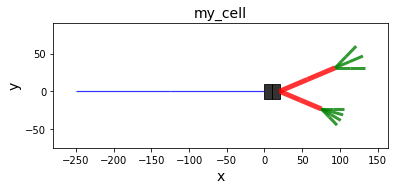

In [2]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

# Defining the sections
sections = ['soma', 'axon', 'dend1', 'dend2', 'db11', 'db12', 'db13', 'db21', 'db22', 'db23', 'db24']

soma, axon, dend1, dend2, db11, db12, db13, db21, db22, db23, db24 = [h.Section(name=n) for n in sections]

# Defininf the geometry
soma.L = soma.diam = 20
axon.L = 250
axon.diam = 10
dend1.L = 80
dend1.diam = 5
dend2.L = 60
dend2.diam = 5
db11.L = 40
db11.diam = 3
db12.L = 40
db12.diam = 3
db13.L = 40
db13.diam = 3
db21.L = 30
db21.diam = 3
db22.L = 30
db22.diam = 3
db23.L = 30
db23.diam = 3
db24.L = 30
db24.diam = 3

# Topology
axon.connect(soma(0)) 
dend1.connect(soma(1)) 
dend2.connect(soma(1)) 
db11.connect(dend1(1)) 
db12.connect(dend1(1))  
db13.connect(dend1(1))
db21.connect(dend2(1)) 
db22.connect(dend2(1))  
db23.connect(dend2(1))
db24.connect(dend2(1))
h.topology()  # Check the topology

# Visualize in Noto
neuron2swc('my_cell.swc', swap_yz=False) # first save
neuron2 = nm.load_neuron('my_cell.swc') # second visualize 
viewer.draw(neuron2)

# Ex2: Visualizing neurons

<font size ="3">Select one of the neurons from your group data set. Write a code that visualize the neuron oriented on the three possible planes (xy, xz and yz), and in 3D, and plot each of its neurites (the neurites only need to be plotted in a single plane). Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have also their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. [1.5 pts]

In [3]:
import neurom as nm
from neurom import viewer
from neurom.view import view
from neurom.view.common import update_plot_limits
import matplotlib.pyplot as plt
import numpy as np

path_to_neuron = '07/morph_01.swc'
neuron = nm.load_neuron(path_to_neuron)
print(neuron.name)

neurites = neuron.neurites
print('# of neurites:', len(neurites))

morph_01
# of neurites: 9


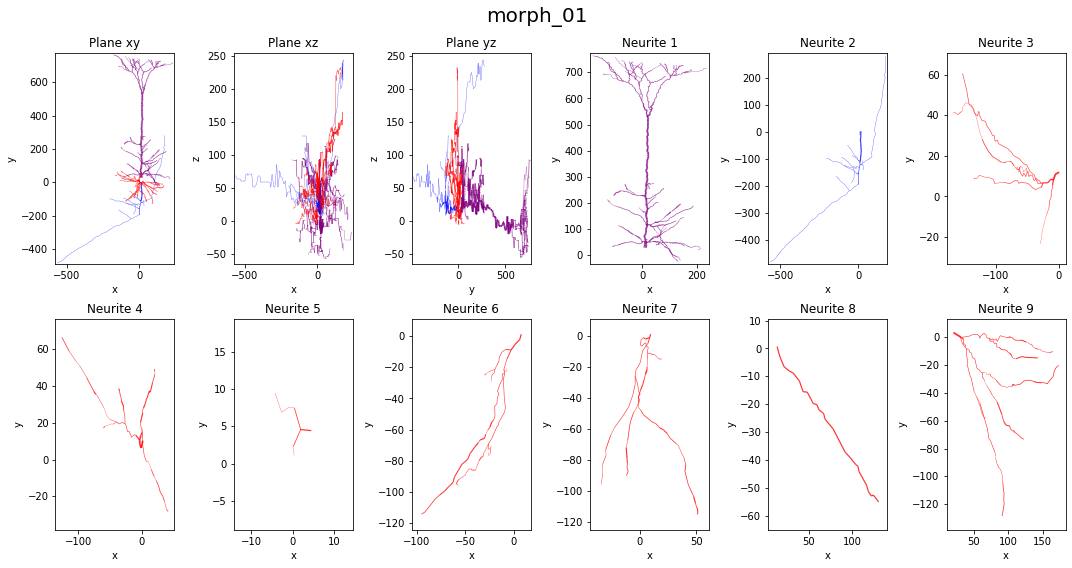

In [4]:
def plot_neuron(neuron):
    
    neurites = neuron.neurites
    
    # number of plots
    N = 3 + len(neurites)
    if N % 2 != 0:
        print('One neurite is not plotted')
        neurites = neurites[:-1]

    fig, (axes0, axes1) = plt.subplots(2, int(N/2), figsize=(15, 8))

    axes = np.concatenate((axes0, axes1))
    # plot axes
    planes = ['xy', 'xz', 'yz']
    for (i, plane) in enumerate(planes):
        current_axes = axes[i]
        view.plot_tree(current_axes, neuron, plane=plane)
        update_plot_limits(current_axes, white_space=10)
        current_axes.set_title('Plane ' + plane)
        current_axes.set_xlabel(plane[0])
        current_axes.set_ylabel(plane[1])
        #current_axes.xaxis.set_ticks([])
        #current_axes.yaxis.set_ticks([])

    # plot neurites
    for (i, neurite) in enumerate(neurites):    
        current_axes = axes[i+3]
        view.plot_tree(current_axes, neurite, plane='xy')
        update_plot_limits(current_axes, white_space=10)
        current_axes.set_title('Neurite ' + str(i+1))
        current_axes.set_xlabel('x')
        current_axes.set_ylabel('y')
        #current_axes.xaxis.set_ticks([])
        #current_axes.yaxis.set_ticks([])

    # set a global title for the figure
    fig.suptitle(neuron.name, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    plt.show()
    
plot_neuron(neuron)

# Ex3: Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, on your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. [1.5 pts]

In [5]:
from neurom.check.runner import CheckRunner

config = {
    'checks': {
        'structural_checks': [
            'is_single_tree',
            'has_valid_soma',
            'has_soma_points',
            'has_sequential_ids',
            'has_increasing_ids',
            'has_valid_neurites',
            'no_missing_parents',
            'has_all_finite_radius_neurites'
        ],
        'neuron_checks': [
            'has_axon',
            'has_basal_dendrite',
            'has_apical_dendrite',
            'has_no_jumps',
            'has_no_fat_ends',
            'has_nonzero_soma_radius',
            'has_all_nonzero_neurite_radii',
            'has_all_nonzero_section_lengths',
            'has_all_nonzero_segment_lengths',
        ]
    },
    'options': {
        'has_nonzero_soma_radius': 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    }
}

check_runner = CheckRunner(config)
path_to_neurons = '07' # path to dir with files group
results = check_runner.run(path_to_neurons) 

for morph in results['files']:
    
    print ("Morphology: {} \n".format(morph))
    
    checks_dict = results['files'][morph]
    
    # Empty strings for our results
    passed = ""
    failed = ""
    
    # Iterate over dictionary's items
    for check_name, status in checks_dict.items():
        
        # The string with the check's name and status
        string = "\t{0: <50} : {1}\n".format(check_name, status)
    
        # Separate passed from failed checks
        if status is True:
            
            passed += string # Concatenates to the current passed string
            
        else:
            
            failed += string # Concatenats to the current failed string

    #print (passed)
    print(failed) # We only print the failed

Morphology: 07/morph_01.swc 

	Has no jumps                                       : False
	Has no fat ends                                    : False
	ALL                                                : False

Morphology: 07/morph_02.swc 


Morphology: 07/morph_03.swc 

	Has apical dendrite                                : False
	ALL                                                : False

Morphology: 07/morph_04.swc 

	Has no jumps                                       : False
	Has no fat ends                                    : False
	ALL                                                : False

Morphology: 07/morph_05.swc 

	Has apical dendrite                                : False
	ALL                                                : False

Morphology: 07/morph_06.swc 


Morphology: 07/morph_07.swc 

	Has apical dendrite                                : False
	Has no jumps                                       : False
	ALL                                                : False

Mor

When running this, we get three distinct errors: has apical dendrite, has no jumps, has no fat ends
    
1. **Has no jumps**. A common problem encountered during morphology reconstruction is the presence of Z jumps. For example, during the reconstruction procedure, an experimenter has to constantly adjsut the focus along the z-axis when using a microscope to look at the cell morphology. If this focus is not correctly adjust we would get big jumps. This type of error can be corrected through manual curation.

2. **Has no fat ends**. Commonly, the preparation of the sample itself leads to systematic artifacts. More specifically, slicing can lead to incomplete morphologies. A common occurence during preparation is axonal slicing. In turn this leads to axonal swelling, which can give rise to these fat ends appearance. Unfortunately artifacts arising from the staining and slicing procedures are hard to correct. But more recent developments, such as CLARITY overcome these.

3. **Has apical dendrites**. This error indicates that its corresponding cell has no apical dendrites. This type of error could arise during the reconstruction process. For example, this could be a case of dangling branches, when we have a gap between two distinct points. When this error arises, we do not know for sure whether the segment should be attached to the rest of the morphology. Hence, the only way to correct this type of error is through manual curation.

# Ex4: Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Represent the result of all the cells using histograms. Find the morphometric charachteristics that best enable you to classify the cells into different groups. Would using a combination of morphometric characteristics improve the classification? Plot the results in a scatter plot[2.5 pts]

In [34]:
# Functions to plot the histograms:

def plot_histogram(neurons, feature, neurite_type=""):
    'function to plot the histogram for each neuron given a feature'
    fig, axes = plt.subplots(1, len(neurons), figsize=(18, 4), sharey = True)
    
    # For each neuron
    for (i, neuron) in enumerate(neurons):
        ax = axes[i]
        if neurite_type:
            data = nm.get(feature, neuron, neurite_type=neurite_type)
        else:
            data = nm.get(feature, neuron)
        ax.hist(data, bins=10, density = True) 
        ax.set_title(neuron.name) # Replace the underscores with spaces in the string
        ax.set_xlabel('units')
        ax.set_ylabel('density')
    fig.suptitle(feature.replace('_', ' '))
    
def plot_joint_histogram(neurons, feature, neurite_type=""):
    'function to plot joint histogram to compare within neurons'
    fig, ax = plt.subplots(figsize=(4, 4))
    
    # For each neuron
    for (i, neuron) in enumerate(neurons):
        if neurite_type:
            data = nm.get(feature, neuron, neurite_type=neurite_type)
        else:
            data = nm.get(feature, neuron)
        ax.hist(data, bins=10, label = neuron.name, alpha=0.6, density=True) 
        ax.set_xlabel('units')
        ax.set_ylabel('density')
    fig.suptitle(feature.replace('_', ' '))
    plt.legend()
    
# Not sure about what they want for the scatter, so we can check this later
def plot_scatter(neurons, feature1, feature2):
    'function to compare classification using more than 2 features'
    fig, ax = plt.subplots(figsize=(4, 4))
    
  #  # For each neuron
    for (i, neuron) in enumerate(neurons):
        data1 = nm.get(feature1, neuron)
        data2 = nm.get(feature2, neuron)
        ax.scatter(data1, data2, label = neuron.name) 
        ax.set_xlabel(feature1.replace('_', ' '))
        ax.set_ylabel(feature2.replace('_', ' '))
    plt.legend()

In [35]:
# directory where all cells are saved
dir_path = '07' 
# cells wo mistakes
good_cells = ['morph_02.swc', 'morph_06.swc', 'morph_10.swc']

neuron1 = nm.load_neuron(dir_path + '/' + good_cells[0])
neuron2 = nm.load_neuron(dir_path + '/' + good_cells[1])
neuron3 = nm.load_neuron(dir_path + '/' + good_cells[2])
neurons = [neuron1, neuron2, neuron3]

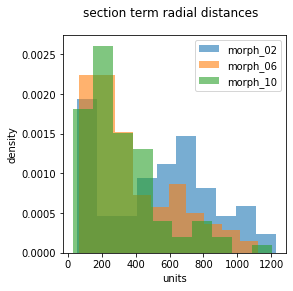

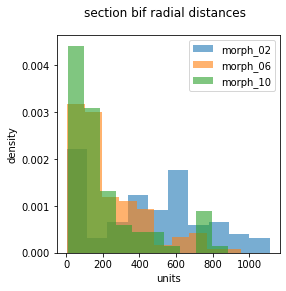

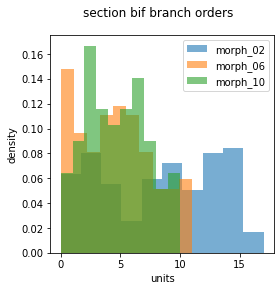

In [36]:
# Based on this, we can select the following features --> 

features = ['segment_radial_distances','section_bif_radial_distances',\
            'section_radial_distances','section_term_radial_distances', 'trunk_angles', \
           'terminal_path_lengths_per_neurite', 'section_bif_branch_orders','sholl_frequency']

# Example on how to plot histogram
#for feature in features:
 #   plot_joint_histogram(neurons, feature = feature)
    
features_selected = ['section_term_radial_distances','section_bif_radial_distances','section_bif_branch_orders']
for feature in features_selected:
    plot_joint_histogram(neurons, feature = feature)
    # To visualize histograms individually:
    # plot_histogram(neurons, feature = feature)

Based on the literature and the visualization of the histograms, we have selected the following features as the main ones:

* **Section term radial distances**. Get the radial distances of the termination sections for a collection of neurites.

* **Section bifurcation radial distances**. Get the radial distances of the bifurcation sections for a collection of neurites

* **Section bifurcation branch orders**. Bifurcation section branch orders in a collection of neurites.

Using these features, we could think that the first neuron belongs to a group (morph_02), while the other two neurons are more similar. This is easier to visualize in the following scatter plot, where we consider both the section bifurcation radial distances and branch orders. From the scatter plot, we see that the first neuron presents higher values for both parameters. 

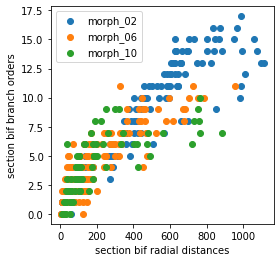

In [37]:
feature1 = 'section_bif_radial_distances'
feature2 = 'section_bif_branch_orders'
plot_scatter(neurons, feature1, feature2)

We can clearly see that combining these two features (Section bifurcation radial distances and Section bifurcation branch orders) allowed us to better classify the data.